In [1]:
import pandas as pd
import os as os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lxml.etree as et

from tqdm import tqdm_notebook as tqdm

from collections import OrderedDict

In [2]:
DATAPATH = '../data/output'

In [3]:
df = pd.read_csv(
    os.path.join(DATAPATH, 'token_id.csv')
)

In [4]:
df.columns = ['token_id']
df.head()

,token_id
0,1
1,2
2,3
3,4
4,5


In [5]:
xml = et.parse(os.path.join(DATAPATH, 'images', '3415.svg'))
svg = xml.getroot()

In [6]:
# for child in svg:
#     if child.tag.lower() == "{http://www.w3.org/2000/svg}style":
#         print(child.text)

In [7]:
# we are looking for the following definitions
properties = [
    '--hat-base',
    '--hat-accent',
    '--medallion-base',
    '--collar-base',
    '--cape-base',
    '--pants-base',
    '--boot-accent',
    '--boot-base',
    '--hands-base',
    '--hands-accent',
    '--wand-accent',
]

In [8]:
for child in svg:
    if child.tag.lower() == "{http://www.w3.org/2000/svg}style":
        text = child.text
        rows = np.array([s.strip(' ') for s in child.text.split('\n')])
        properties_with_values = [rows[[r.startswith(p) for r in rows]][0].rstrip(';') for p in properties]

In [9]:
[p.split(' ') for p in properties_with_values]

[['--hat-base:', '#FFFFFF'],
 ['--hat-accent:', '#FF88F9'],
 ['--medallion-base:', '#FF88F9'],
 ['--collar-base:', '#FFFFFF'],
 ['--cape-base:', '#A66EFF'],
 ['--pants-base:', '#FFFFFF'],
 ['--boot-accent:', '#C17D49'],
 ['--boot-base:', '#9B4F40'],
 ['--hands-base:', '#FFFFFF'],
 ['--hands-accent:', '#FFFFFF'],
 ['--wand-accent:', '#FF88F9']]

In [10]:
# create dataframe for all wizards and theit colors

In [12]:
res = []
for t in tqdm(df['token_id']):
    xml = et.parse(os.path.join(DATAPATH, 'images', f'{t}.svg'))
    svg = xml.getroot()
    for child in svg:
        if child.tag.lower() == "{http://www.w3.org/2000/svg}style":
            text = child.text
            lines = np.array([s.strip(' ') for s in child.text.split('\n')])
            properties_with_values = [lines[[r.startswith(p) for r in lines]][0].rstrip(';') for p in properties]
            
            res.append([p.split(' ')[1] for p in properties_with_values])
            
            # print(properties_with_values)
    # break

In [13]:
df_colors = pd.DataFrame(
    data=res,
    columns=[p.lstrip('-').replace('-', '_') for p in properties],
    index=df['token_id']
)

df_colors.head()

,hat_base,hat_accent,medallion_base,collar_base,cape_base,pants_base,boot_accent,boot_base,hands_base,hands_accent,wand_accent
token_id,,,,,,,,,,,
1,#FFFFFF,#FFC200,#FFC200,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#FFFFFF,#A66EFF
2,#2B2B2B,#FFC200,#FFC200,#FFFFFF,#D8A53F,#2B2B2B,#C17D49,#9B4F40,#FFFFFF,#FFFFFF,#6EFFF8
3,#2B2B2B,#FFC200,#FFC200,#FFFFFF,#D8A53F,#2B2B2B,#C17D49,#9B4F40,#FFFFFF,#FFFFFF,#84FF61
4,#2B2B2B,#FFC200,#FFC200,#FFFFFF,#D8A53F,#2B2B2B,#C17D49,#9B4F40,#FFFFFF,#FFFFFF,#FF4848
5,#2B2B2B,#FFC200,#FFC200,#FFFFFF,#D8A53F,#2B2B2B,#C17D49,#9B4F40,#FFFFFF,#FFFFFF,#6EFFF8


In [16]:
df_melted = df_colors.reset_index().melt(id_vars='token_id')
df_melted.columns = ['token_id', 'property', 'color']
df_melted.head()

,token_id,property,color
0,1,hat_base,#FFFFFF
1,2,hat_base,#2B2B2B
2,3,hat_base,#2B2B2B
3,4,hat_base,#2B2B2B
4,5,hat_base,#2B2B2B


In [19]:
palette = OrderedDict({k:k for k in sorted(df_melted['color'].unique())}) 
palette

OrderedDict([('#2B2B2B', '#2B2B2B'),
             ('#3DADEA', '#3DADEA'),
             ('#3FE04B', '#3FE04B'),
             ('#4CC94C', '#4CC94C'),
             ('#50A7EF', '#50A7EF'),
             ('#565656', '#565656'),
             ('#5AF99A', '#5AF99A'),
             ('#66EDFF', '#66EDFF'),
             ('#6EFFF8', '#6EFFF8'),
             ('#7D56ED', '#7D56ED'),
             ('#84FF61', '#84FF61'),
             ('#8F5CE0', '#8F5CE0'),
             ('#9A8FFF', '#9A8FFF'),
             ('#9B4F40', '#9B4F40'),
             ('#A66EFF', '#A66EFF'),
             ('#BFCBD1', '#BFCBD1'),
             ('#C17D49', '#C17D49'),
             ('#D8A53F', '#D8A53F'),
             ('#FF4848', '#FF4848'),
             ('#FF506E', '#FF506E'),
             ('#FF526F', '#FF526F'),
             ('#FF85A5', '#FF85A5'),
             ('#FF88F9', '#FF88F9'),
             ('#FF9FFF', '#FF9FFF'),
             ('#FFAC48', '#FFAC48'),
             ('#FFC200', '#FFC200'),
             ('#FFDC4A', '#FFDC4A'),
 

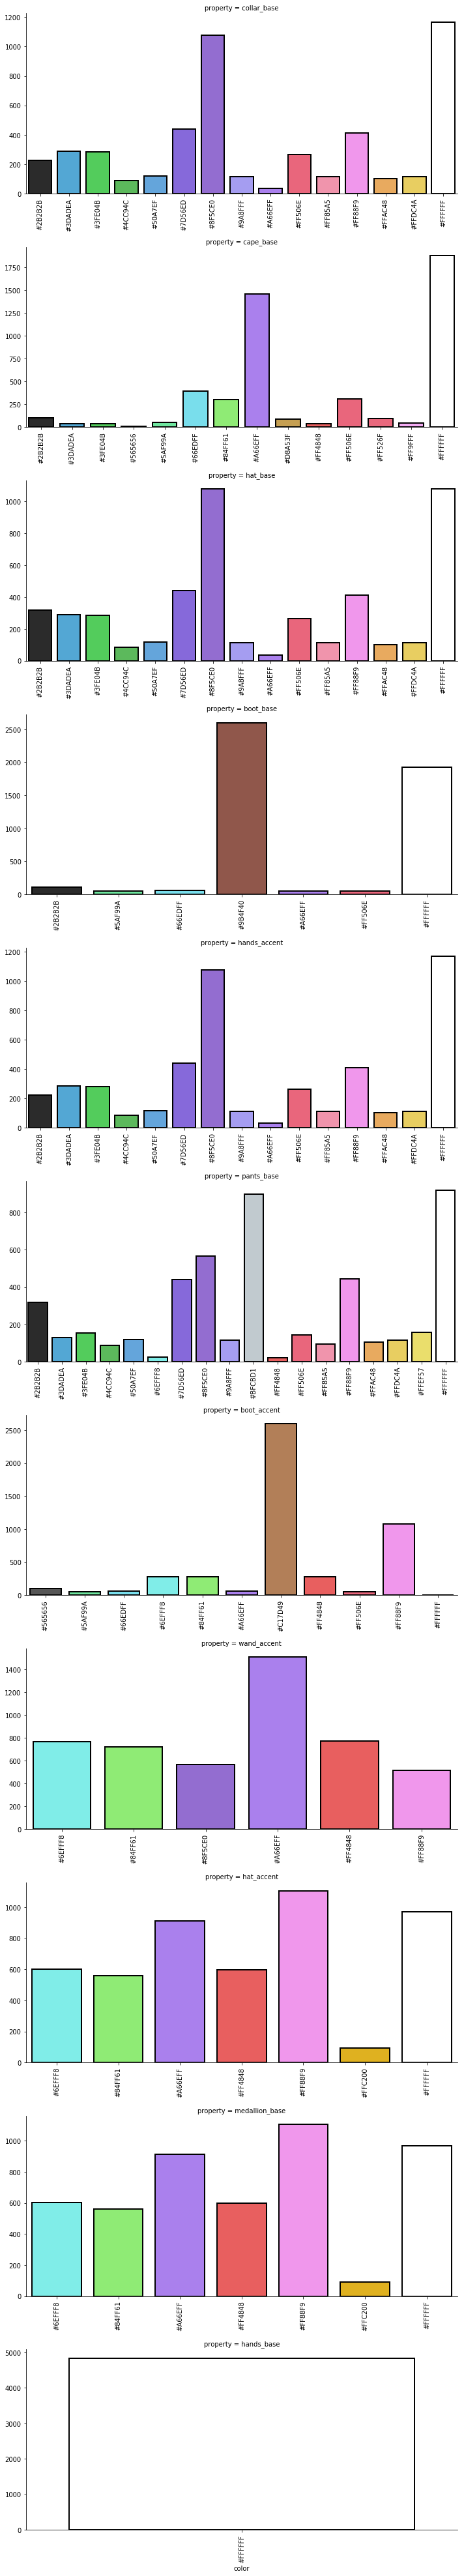

In [107]:
%%capture --no-display
g = sns.FacetGrid(
    # sorting fixes the order issue
    data=df_melted.sort_values(by='color'),
    row='property',
    height=5,
    aspect=2,
    sharex=False,
    sharey=False,
)

# you have to generate the palette on fly
g.map(
    sns.countplot, 
    'color',
    # order=palette, # to plot all tags 
    palette=palette,
    linewidth=2,
    edgecolor=(0, 0, 0), 
)

# rotate x axis labels
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
# give more spaces for labels
plt.tight_layout()

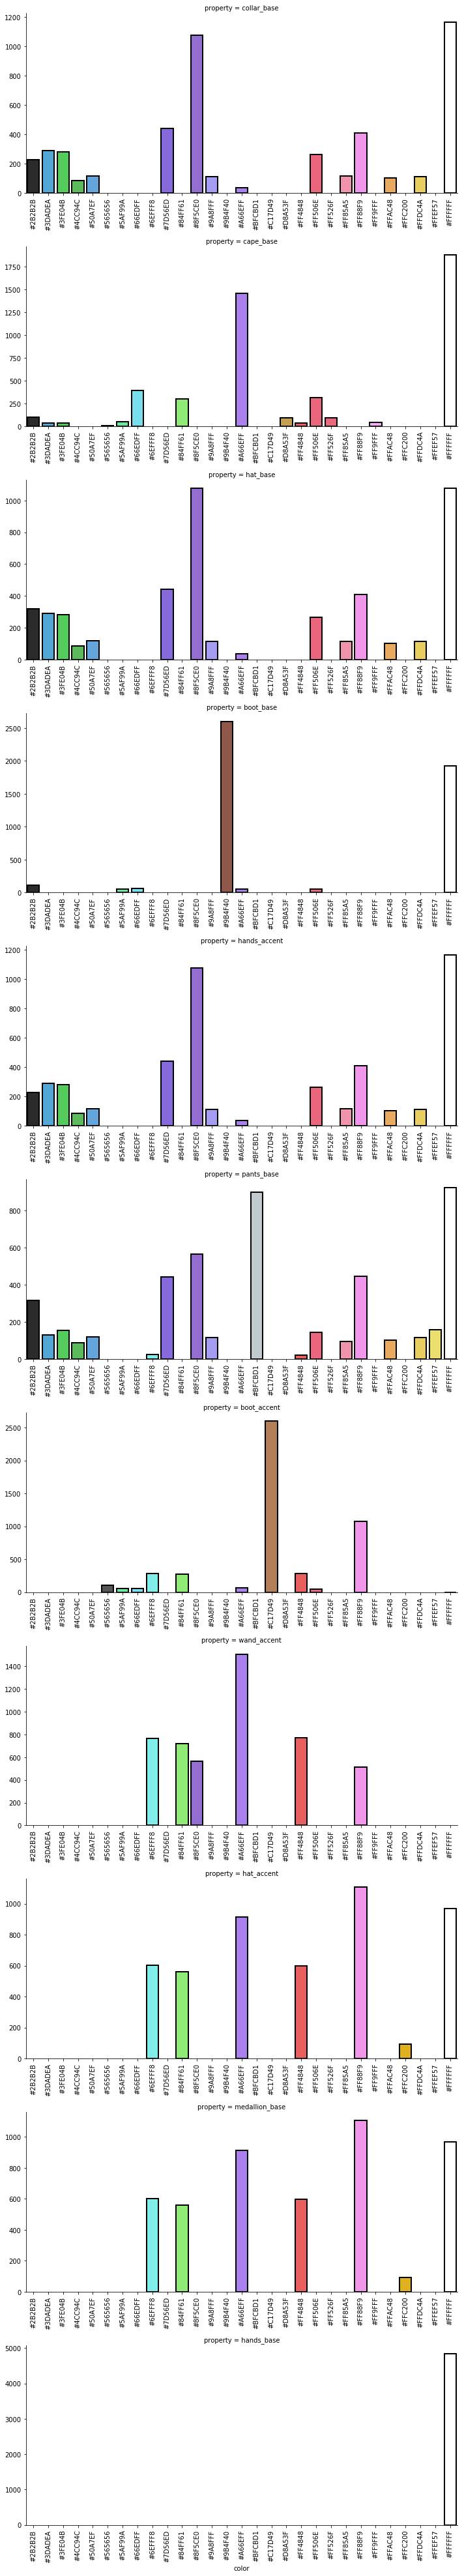

In [59]:
g = sns.FacetGrid(
    # sorting fixes the order issue
    data=df_melted.sort_values(by='color'),
    row='property',
    height=5,
    aspect=2,
    sharex=False,
    sharey=False,
)

# you have to generate the palette on fly
g.map(
    sns.countplot, 
    'color',
    order=palette, # to plot all tags 
    palette=palette, 
    linewidth=2,
    edgecolor=(0, 0, 0), 
)

# rotate x axis labels
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];
# give more spaces for labels
plt.tight_layout()